In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from util import get_decayed_value
import sys
import os

# Add the path where `config.py` is located to sys.path if necessary
sys.path.append(os.path.abspath("/home/hanyang/diffusion_alignment/ddpo_improved/config"))  # Adjust this path

from config.base import get_config

# Linear

In [20]:
config = get_config()
config.sample.decay.type = "linear"
config.sample.decay.linear.decay_rate = 0.005

In [21]:
eta = []
for i in range(100):
    eta.append(get_decayed_value(i, config))

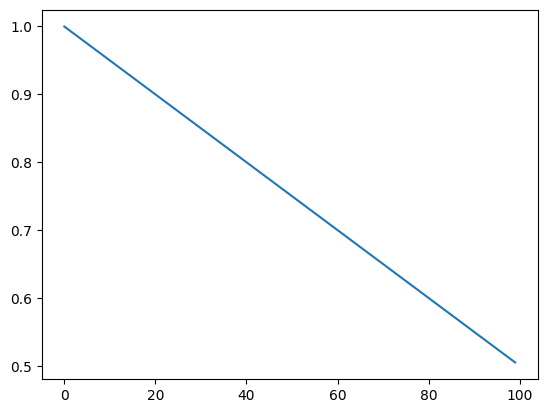

In [22]:
plt.plot(eta)

# Cosine

In [3]:
config = get_config()

In [4]:
config

allow_tf32: true
logdir: logs
mixed_precision: fp16
num_checkpoint_limit: 5
num_epochs: 100
penalty_constant: 0.01
per_prompt_stat_tracking:
  buffer_size: 16
  min_count: 16
pretrained:
  model: runwayml/stable-diffusion-v1-5
  revision: main
prompt_fn: imagenet_animals
prompt_fn_kwargs: {}
resume_from: ''
reward_fn: jpeg_compressibility
run_name: ''
sample:
  batch_size: 1
  decay:
    cosine:
      max_steps: 200
    exponential:
      decay_rate: 0.9
    initial_value: 1.0
    linear:
      decay_rate: 0.005
    polynomial:
      max_steps: 200
      power: 2.0
    step:
      decay_rate: 0.5
      decay_steps: 5
    type: cosine
  eta: 1.0
  guidance_scale: 5.0
  num_batches_per_epoch: 2
  num_steps: 50
save_freq: 20
seed: 42
train:
  adam_beta1: 0.9
  adam_beta2: 0.999
  adam_epsilon: 1.0e-08
  adam_weight_decay: 0.0001
  adv_clip_max: 5
  batch_size: 1
  cfg: true
  clip_range: 0.0001
  gradient_accumulation_steps: 1
  learning_rate: 0.0003
  max_grad_norm: 1.0
  num_inner_epoch

In [5]:
config.sample.decay.type = "cosine"
config.sample.decay.cosine.max_steps = 200

In [7]:
get_decayed_value(30, config)

0.9455032620941839

In [12]:
eta = []
for i in range(100):
    eta.append(get_decayed_value(i, config))

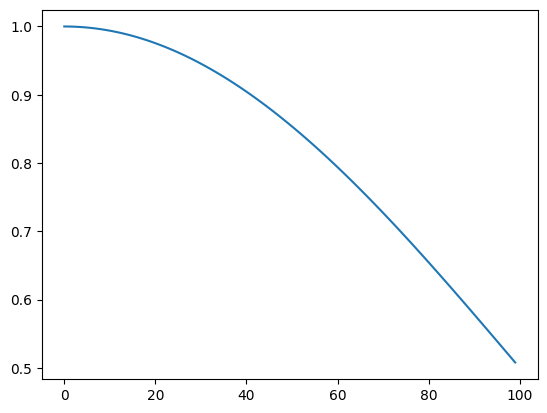

In [13]:
plt.plot(eta)

## Clip

In [32]:
clip = 0.0001 + 0.0001 * 2 * (1 - np.array(eta))

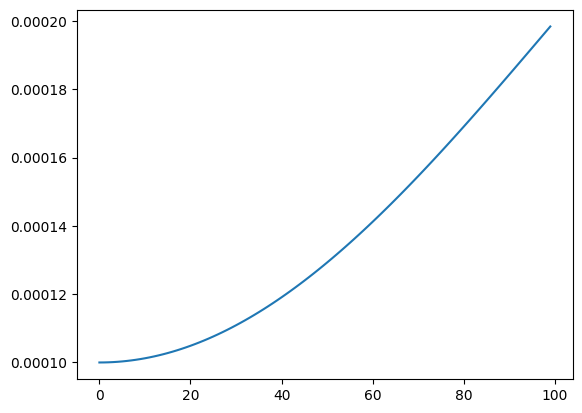

In [33]:
plt.plot(clip)

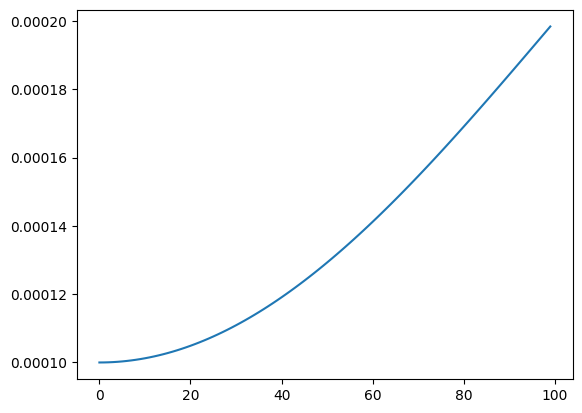

In [18]:
plt.plot(clip)

# Exponential

In [ ]:
config = get_config()
config.sample.decay.type = "exponential"
config.sample.decay.exponential.decay_rate = 0.99

In [ ]:
eta = []
for i in range(100):
    eta.append(get_decayed_value(i, config))

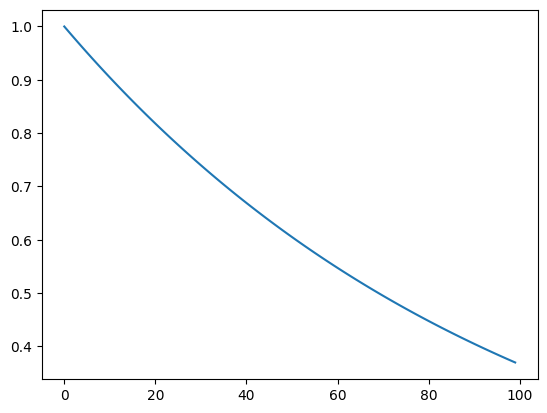

In [ ]:
plt.plot(eta)

# Step

In [ ]:
config = get_config()
config.sample.decay.type = "step"
#config.sample.decay.step.decay_rate = 0.99

In [ ]:
config.sample.decay.step.decay_rate

0.5

In [ ]:
config.sample.decay.step.decay_steps

100

In [ ]:
config.sample.decay.step.decay_rate = 0.9
config.sample.decay.step.decay_steps = 10

In [ ]:
eta = []
for i in range(100):
    eta.append(get_decayed_value(i, config))

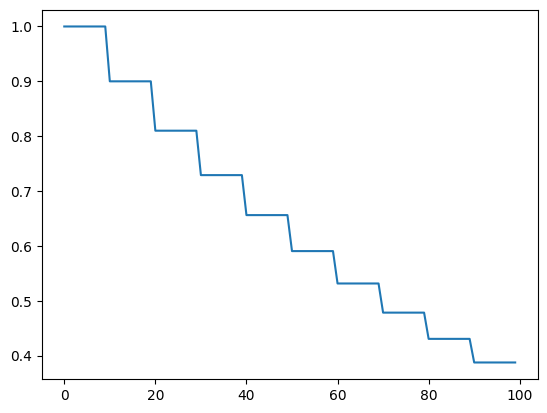

In [ ]:
plt.plot(eta)

# Polynomial

In [25]:
config = get_config()
config.sample.decay.type = "polynomial"
#config.sample.decay.step.decay_rate = 0.99

In [ ]:
config.sample.decay.step.decay_rate

0.5

In [ ]:
config.sample.decay.step.decay_steps

100

In [ ]:
config.sample.decay.step.decay_rate = 0.9
config.sample.decay.step.decay_steps = 10

In [ ]:
eta = []
for i in range(100):
    eta.append(get_decayed_value(i, config))

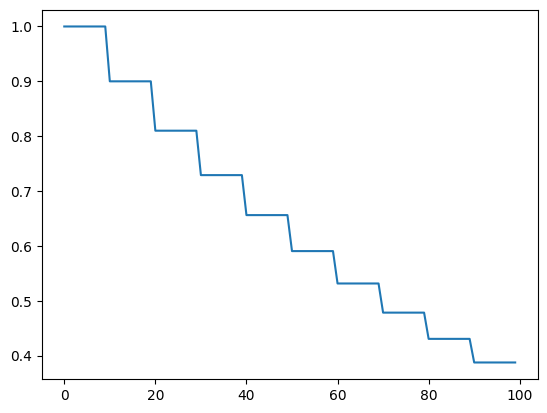

In [ ]:
plt.plot(eta)